<a href="https://colab.research.google.com/github/Mineth03/Dementia-Prediction-System-With-Comprehensive-Features/blob/Basic_Dementia_Prediction/Dementia%20prediction%20with%20common%20factors/Python%20Notebook/RFModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

In [92]:
data = pd.read_csv("BasicDP.csv")

In [93]:
X = data.drop(columns=["Dementia"])
y = data["Dementia"]

In [94]:
# Apply SMOTE
smote = SMOTE(
    random_state=42,
    k_neighbors=3,
    sampling_strategy=1
)
X, y = smote.fit_resample(X, y)

In [95]:
# Data splitting
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [96]:
# Apply SMOTE
#smote = SMOTE(
#    random_state=42,
#    k_neighbors=3,
#    sampling_strategy=1
#)
#XTrain, yTrain = smote.fit_resample(XTrain, yTrain)

In [97]:
# Initialize the RF model
RF = RandomForestClassifier(
    random_state=42,
    n_estimators=200,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='log2',
    class_weight='balanced',
    max_depth=50
)

In [98]:
# Train the model
RF.fit(XTrain, yTrain)

RandomForestClassifier(class_weight='balanced', max_depth=50,
                       max_features='log2', min_samples_leaf=5,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [99]:
# Predictions for training and testing sets
trainPred = RF.predict(XTrain)
testPred = RF.predict(XTest)

In [100]:
# Calculate accuracies
trainAcc = accuracy_score(yTrain, trainPred)
testAcc = accuracy_score(yTest, testPred)

In [101]:
print(f"Training Set Accuracy: {trainAcc:.4f}")
print(f"Testing Set Accuracy: {testAcc:.4f}")

Training Set Accuracy: 0.8764
Testing Set Accuracy: 0.8256


In [102]:
# Classification report
classReport = classification_report(yTest, testPred)

In [103]:
print("\nClassification Report:\n", classReport)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82     25098
           1       0.80      0.87      0.83     25098

    accuracy                           0.83     50196
   macro avg       0.83      0.83      0.83     50196
weighted avg       0.83      0.83      0.83     50196



In [104]:
# ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(yTest, RF.predict_proba(XTest)[:, 1]), "\n")

ROC-AUC Score: 0.907034623494961 



In [105]:
# Confusion matrix
cm = confusion_matrix(yTest, testPred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])

<Figure size 800x600 with 0 Axes>

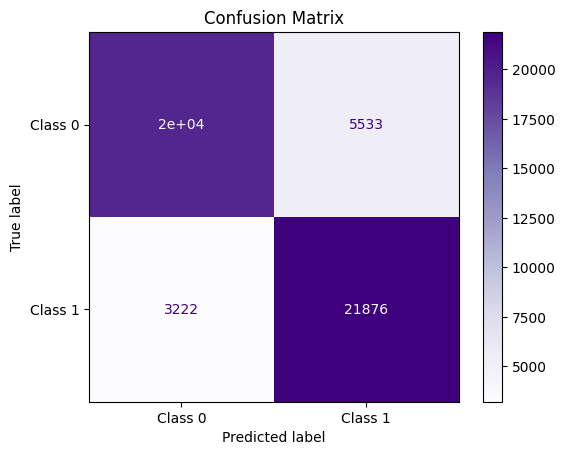

In [106]:
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix")
plt.show()

In [107]:
# Save the trained model to a .h5 file
joblib.dump(RF, 'BasicDP.h5')
print("Model saved to BasicDP.h5")

Model saved to BasicDP.h5


In [108]:
joblib.dump(RF, 'BasicDP.pkl')
print("Model saved to BasicDP.pkl")

Model saved to BasicDP.pkl
